# Exercise 9.1 Poisson Equation
<img src="./image/0902_01.png" width="400"></img>
![formula2](./image/0902_02'.png)
![formula2](./image/0902_02.png)

In [8]:
from numpy import empty, zeros, max, ones, array
from pylab import imshow, gray, show
from matplotlib.pyplot import draw
M = 100
V = 1.0
target = 1e-3

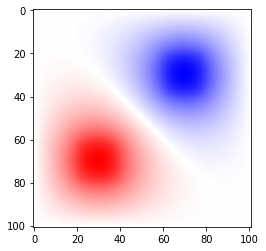

In [18]:
#create arrays to hold potential values
phi = zeros([M+1,M+1],float)
for i in range(60,80):
    for j in range(20,40):
        phi[i,j] = 5

for i in range(20,40):
    for j in range(60,80):
        phi[i,j] = -5
        
phi[0,:] = 0
phi[M,:] = 0
phi[:,0] = 0
phi[:,M] = 0

phiprime = empty([M+1,M+1],float)

#main loop
delta = 1.0
while delta > target:
    #calculate new values of the potential
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i,j] = phi[i,j]
            elif i >= 60 and i < 80 and j >= 20 and j < 40:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4 + 5/4
#                 phiprime[i,j] =  5/4
            elif i >= 20 and i < 40 and j >= 60 and j < 80:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4 - 5/4  
#             phiprime[i,j] =  -5/4
            else:
                phiprime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4
    
    #calculate maximum difference from old values
    delta = max(abs(phi - phiprime))
    
    #swap the two arrays around
    phi, phiprime = phiprime, phi
            
imshow(phi, cmap="bwr")
# gray()

show()